<a href="https://colab.research.google.com/github/gachet/mis-colabs/blob/master/ejer_euler_runge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
## module printSoln
''' printSoln(X,Y,freq).
    Imprime X e Y devueltos por cualquier método de
    resoluciçon de ecuaciones diferenciales.
        freq = n  imprime los valores en el paso nth.
        freq = 0 imprime unicamente los valores inicial y final.
'''
def printSoln(X,Y,freq):

    def printHead(n):
        print("\n        x  ",end=" ")
        for i in range (n):
            print("      y[",i,"] ",end=" ")
        print()

    def printLine(x,y,n):
        print("{:13.4e}".format(x),end=" ")
        for i in range (n):
            print("{:13.4e}".format(y[i]),end=" ")
        print()
    
    m = len(Y)
    try: n = len(Y[0])
    except TypeError: n = 1
    if freq == 0: freq = m
    printHead(n)
    for i in range(0,m,freq):
        printLine(X[i],Y[i],n)
    if i != m - 1: printLine(X[m - 1],Y[m - 1],n)


In [0]:
def euler(F, x0, y0, x, h):
    '''
    Retorna y(x) dado el problema de valor inicial:
    y' = F(x, y)
    y(x0) = y0 # condiciones iniciales
    h es el incremento de x utilizado en la integración
    F = [y'[0], y'[1], ..., y'[n-1]]
    y = [y[0], y[1], ..., y[n-1]]
    '''
    X = [] # almacenamos los valores  de x0 en cada iteración
    Y = [] # almacenamos los valores de y0 en cada iteración
    while x0 < x:
        h = min(h, x-x0)
        y0 = y0 + h*F(x0, y0)
        x0 += h
        X.append(x0)
        Y.append(y0)
    return np.array(X), np.array(Y)

### Ejemplo 1

Integrar el sguiente problema de valor inicial:
$$
y' + 4y = x^2 \quad y(0) = 1
$$
en pasos de  $h=0.01$ desde $x=0$ a $0.03$. 

Determinar el error sabiendo que la solución analítica es :
$$
y = \frac{31}{32}e^{-4x}+\frac{1}{4}x^2-\frac{1}{8}x+\frac{1}{32}
$$

In [0]:
def F1(x, y):
    return x**2 - 4*y

In [0]:
def F2(x, y):
    F = np.zeros(1)
    F[0] = x**2 - 4*y[0]
    return F

In [0]:
X, Y = euler(F1, 0, np.array([ 1.0]), 0.03, 0.01)
printSoln(X,Y,0)


        x         y[ 0 ]  
   1.0000e-02    9.6000e-01 
   3.0000e-02    8.8474e-01 


In [0]:
X, Y = euler(F2, 0, np.array([ 1.0]), 0.03, 0.01)
printSoln(X,Y,0)


        x         y[ 0 ]  
   1.0000e-02    9.6000e-01 
   3.0000e-02    8.8474e-01 


In [0]:
soluc = lambda x: 31/32*np.exp(-4*x)+1/4*x**2-1/8*x+1/32

In [0]:
errores = soluc(X)-Y
print (errores)

[[ 0.00078977 -0.03688104 -0.07307083]
 [ 0.03918877  0.00151796 -0.03467183]
 [ 0.07604881  0.038378    0.00218821]]


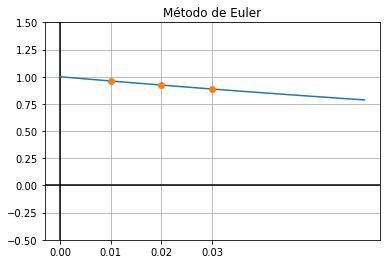

In [0]:

x_graf = np.linspace(0,0.06,100)
y_graf = soluc(x_graf)

#plt.figure(figsize = (5.5,2) )
bottom, top = -0.5,1.5  # return the current ylim
plt.ylim((bottom, top))   # set the ylim to bottom, top

plt.xticks(np.arange(0, 0.04, 0.01))
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('Método de Euler')
plt.plot(x_graf,y_graf)
plt.plot(X,Y,'o')
plt.show()



### Ejemplo 2  (ecuación diferencial de orden 2)

Integrar el problema de valor inicial:
$$
y'' = -0.1y'-x \quad y(0) = 0 \quad y'(0) = 1
$$
desde $x=0$ to $2$ utilizando $h=0.05$. graficar $y$ con la solución analítica:
$$
y = 100x-5x^2+990(e^{-0.1x}-1)
$$

Con la notación $y_0 = y \,\,$y $\,\, y_1 = y'$
$$
\textbf{F}(x, \textbf{y}) = \begin{bmatrix}
y'_0 \\
y'_1 \\
\end{bmatrix} = \begin{bmatrix}
y_1 \\
-0.1y_1 -x\\
\end{bmatrix}\hspace{1cm}\textbf{y}(0) = \begin{bmatrix}
0 \\
1 
\end{bmatrix}
$$

In [0]:
def F(x, y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -0.1*y[1]-x
    return F

In [0]:
X, Y = euler(F, 0, np.array([0, 1]), 2, 0.05)


In [0]:
printSoln(X,Y,10)


        x         y[ 0 ]        y[ 1 ]  
   5.0000e-02    5.0000e-02    9.9500e-01 
   5.5000e-01    5.1603e-01    8.1090e-01 
   1.0500e+00    8.3655e-01    3.9134e-01 
   1.5500e+00    8.9645e-01   -2.5214e-01 
   2.0000e+00    6.3692e-01   -1.0137e+00 


In [0]:
soluc2 =  lambda x: 100*x-5*x**2+990*(np.exp(-0.1*x)-1)

In [0]:
errores = soluc2(X)-Y[:,0]
print(errores)

[-0.0001456  -0.00041459 -0.00080604 -0.00131905 -0.00195268 -0.00270605
 -0.00357825 -0.00456838 -0.00567556 -0.00689891 -0.00823754 -0.0096906
 -0.01125721 -0.01293651 -0.01472766 -0.01662981 -0.01864211 -0.02076373
 -0.02299384 -0.02533162 -0.02777623 -0.03032688 -0.03298275 -0.03574305
 -0.03860696 -0.04157371 -0.04464249 -0.04781254 -0.05108308 -0.05445333
 -0.05792254 -0.06148993 -0.06515475 -0.06891626 -0.07277371 -0.07672635
 -0.08077345 -0.08491429 -0.08914814 -0.09347427]


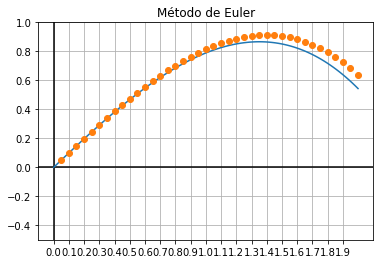

In [0]:
x_graf = np.linspace(0,2,100)
y_graf = soluc2(x_graf)

#plt.figure(figsize = (5.5,2) )
bottom, top = -0.5,1  # return the current ylim
plt.ylim((bottom, top))   # set the ylim to bottom, top

plt.xticks(np.arange(0,2, 0.1))
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('Método de Euler')
plt.plot(x_graf,y_graf)
plt.plot(X,Y[:,0],'o')
plt.show()

In [0]:
def runge_kutta_2(F, x0, y0, x, h):
    X = []
    Y = []
    X.append(x0)
    Y.append(y0)
    while x0 < x:
        k0 = F(x0, y0)
        k1 = F(x0+h/2, y0 + h/2*k0)
        y0 = y0 + h*k1
        x0 += h
        X.append(x0)
        Y.append(y0)
    return np.array(X), np.array(Y)

In [0]:
def runge_kutta_4(F, x0, y0, x, h):
    '''
    Retorna y(x) dado el siguiente problema de valor inicial:
    y' = F(x, y)
    y(x0) = y0 # condiciones iniciales
    h es el incremento de x utilizado en la integración
    F = [y'[0], y'[1], ..., y'[n-1]]
    y = [y[0], y[1], ..., y[n-1]]
    '''
    X = []
    Y = []
    X.append(x0)
    Y.append(y0)
    while x0 < x:
        k0 = F(x0, y0)
        k1 = F(x0+h/2.0, y0 + h/2.0*k0)
        k2 = F(x0 + h/2.0, y0 + h/2*k1)
        k3 = F(x0+h, y0+h*k2)
        y0 = y0 + h/6.0*(k0+2*k1+2.0*k2+k3)
        x0 += h
        X.append(x0)
        Y.append(y0)
    return np.array(X),np.array(Y)

### Nuevamente el ejemplo 2

In [0]:
def F(x, y):
    return np.array([
                    y[1],
                    -0.1*y[1]-x
                ])

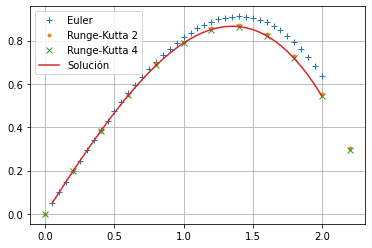

In [0]:
X, Y = euler(F, 0, np.array([0, 1]), 2, 0.05)
X1, Y1 = runge_kutta_2(F, 0, np.array([0, 1]), 2, 0.2)
X2, Y2 = runge_kutta_4(F, 0, np.array([0.0, 1.0]), 2.0, 0.2)
plt.grid(True)
plt.plot(X, Y[:,0], '+')
plt.plot( X1, Y1[:,0], '.')
plt.plot(X2, Y2[:,0], 'x')
plt.plot(X, 100.0*X-5.0*X**2+990.0*(np.exp(-0.1*X)-1.0))
plt.legend(['Euler ',
           'Runge-Kutta 2',
            'Runge-Kutta 4',
           'Solución'])
plt.show()

Utilizar el método de Euler para aproximar las soluciones
de cada uno de los siguientes problemas de valor inicial:<br><br>
$$
y'= y -t^2 +1 y \hspace{1 cm} 0 \leq t \leq 2 \hspace{1cm} y(0) = 0.5 \hspace{1cm}h=0.5 \\
y'= 1 + (t-y)^2 \hspace{1 cm} 2 \leq t \leq 3 \hspace{1cm} y(2) = 1 \hspace{1cm}h=0.5 \\
y'= 1 + -y \hspace{1 cm} 0 \leq t \leq 5 \hspace{1cm} y(2) = 9 \hspace{1cm}h=0.1 
$$

In [0]:
def F(x, y):
    return y-x**2+y

In [0]:
x = 0.0
xstop = 2.0
y = np.array([0.5])
X,Y = euler(F, x, y, xstop, 0.5)

In [0]:
printSoln(X,Y,1)


        x         y[ 0 ]  
   5.0000e-01    1.0000e+00 
   1.0000e+00    1.8750e+00 
   1.5000e+00    3.2500e+00 
   2.0000e+00    5.3750e+00 


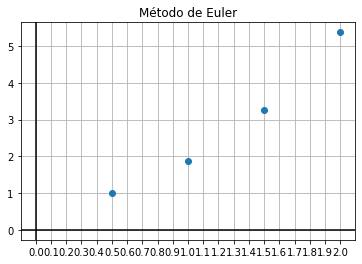

In [0]:
plt.xticks(np.arange(0, 2.1, 0.1))
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('Método de Euler')
plt.plot(X,Y,'o')
plt.show()


In [0]:
def F1(x, y):
    F = np.zeros(1)
    F[0] =  1 + (x-y[0])**2
    return F

In [0]:
x = 2.0
xstop = 3.0
y = np.array([1])
X,Y = euler(F1, x, y, xstop, 0.0005)

In [0]:
printSoln(X,Y,0)


        x         y[ 0 ]  
   2.0005e+00    1.0010e+00 
   3.0000e+00    2.5001e+00 


Utilizar el método de Runge-kutta de orden 2 para
para aproximar las solución exacta de :<br><br>
$$
y'= \frac{2}{x}y +x^2e^x  \hspace{1 cm} 1 \leq t \leq 2 \hspace{1cm} y(1) = 0. \hspace{1cm}h=0.1 $$
Comparar con la solución exacta $ y(x) = x^2(e^x-e)$ 


In [0]:
def F2(x,y):
    return (2/x)*y + x**2*np.exp(x)


In [0]:
def exacta (x):
    return x**2*(np.exp(x)-np.exp(1))

In [0]:
x = 1.0
xstop = 2.0
y = np.array([0])
X,Y = runge_kutta_2(F2, x, y, xstop, 0.1)

In [0]:
printSoln(X,Y,1)


        x         y[ 0 ]  
   1.0000e+00    0.0000e+00 
   1.1000e+00    3.4094e-01 
   1.2000e+00    8.5491e-01 
   1.3000e+00    1.5867e+00 
   1.4000e+00    2.5888e+00 
   1.5000e+00    3.9225e+00 
   1.6000e+00    5.6594e+00 
   1.7000e+00    7.8827e+00 
   1.8000e+00    1.0689e+01 
   1.9000e+00    1.4192e+01 
   2.0000e+00    1.8520e+01 


In [0]:
exacta(2)

18.683097081886423

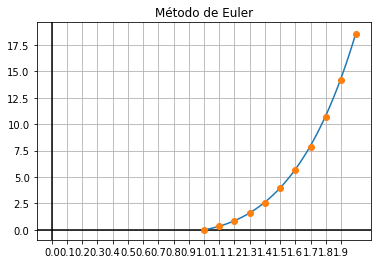

In [0]:
x_graf = np.linspace(1,2,100)
y_graf = exacta(x_graf)

#plt.figure(figsize = (5.5,2) )
#bottom, top = -0.5,1.5  # return the current ylim
#plt.ylim((bottom, top))   # set the ylim to bottom, top

plt.xticks(np.arange(0, 2, 0.1))
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('Método de Euler')
plt.plot(x_graf,y_graf)
plt.plot(X,Y,'o')
plt.show()



Un paracaidista de masa $m$ en caída libre experimenta una fuerza de rozamiento $F_D = c_d y^2$, donde $y$ se mide verticalmente hacia abajo desde el momento inicial de la caída. la ecuación diferencial que describe el movimiento es :
    $$
    y'' = g - \frac{C_D}{m}y'^2
    $$
    
Determinar el tiempo cuando ha descendido 500 m. Utilizar $g=9.8066 \,\, m/s^2$, $C_D= 0.2028\,\, kg/m $ y $m=80\,\, kg$
Utilizar Runge-Kutta de 4to orden con $h=0,25\,\, s$

In [0]:
def F(x,y):
    g = 9.80665; c = 0.2028; m =80.0
    F = np.zeros(2)
    F [0] = y [1] 
    F [1] = g - c/m*y[1]**2
    return F



In [0]:
x= 0.0
xstop = 15.0
y = np.array([0.0,0.0])
h=0.25
X,Y = runge_kutta_4(F, x, y, xstop, h)

In [0]:
printSoln(X,Y,10)


        x         y[ 0 ]        y[ 1 ]  
   0.0000e+00    0.0000e+00    0.0000e+00 
   2.5000e+00    2.9884e+01    2.3321e+01 
   5.0000e+00    1.1166e+02    4.0893e+01 
   7.5000e+00    2.2847e+02    5.1515e+01 
   1.0000e+01    3.6504e+02    5.7102e+01 
   1.2500e+01    5.1162e+02    5.9828e+01 
   1.5000e+01    6.6299e+02    6.1109e+01 


![imagen.png](attachment:imagen.png)
Un sistema masa resorte está en reposo cuando se aplica una 
fuerza $P(t)$ siendo:<br>
$
P(t) = \left\{\begin{matrix}
10t \,\,N &para \,\, t< 2\,s \\ 
20 \,\,N & para \,\, t \geq 2\,s
\end{matrix}\right.
$<br>
La ecuación diferencial que define el movimiento es:<br>
$
y'' = \frac{P(t)}{m}-\frac{k}{m}y
$<br>
Determinar es desplazamiento máximo de la masa. Utilizar $m=2.5 \,kg$ y  $k=75 \,N/m$



In [0]:
def F(x,y):
    m = 2.5; k = 75.0
    if x < 2.0: P = 10.0*x
    else: P = 20.0
    F = np.zeros(2)
    F[0] = y[1];
    F[1] = (P - k*y[0])/m
    return F

In [0]:
x= 0.0
xstop = 2.4
y = np.array([0.0,0.0])
h=0.1
X,Y = runge_kutta_4(F, x, y, xstop, h)

In [0]:
printSoln(X,Y,1)


        x         y[ 0 ]        y[ 1 ]  
   0.0000e+00    0.0000e+00    0.0000e+00 
   1.0000e-01    6.6667e-04    1.9500e-02 
   2.0000e-01    5.0383e-03    7.2248e-02 
   3.0000e-01    1.5732e-02    1.4282e-01 
   4.0000e-01    3.3516e-02    2.1060e-01 
   5.0000e-01    5.7088e-02    2.5578e-01 
   6.0000e-01    8.3454e-02    2.6517e-01 
   7.0000e-01    1.0881e-01    2.3605e-01 
   8.0000e-01    1.2964e-01    1.7692e-01 
   9.0000e-01    1.4375e-01    1.0509e-01 
   1.0000e+00    1.5093e-01    4.1531e-02 
   1.1000e+00    1.5297e-01    4.8153e-03 
   1.2000e+00    1.5317e-01    5.6580e-03 
   1.3000e+00    1.5537e-01    4.3799e-02 
   1.4000e+00    1.6283e-01    1.0808e-01 
   1.5000e+00    1.7725e-01    1.7972e-01 
   1.6000e+00    1.9832e-01    2.3778e-01 
   1.7000e+00    2.2377e-01    2.6531e-01 
   1.8000e+00    2.5006e-01    2.5427e-01 
   1.9000e+00    2.7341e-01    2.0790e-01 
   2.0000e+00    2.9089e-01    1.3977e-01 
   2.1000e+00    3.0063e-01    5.0283e-02 
   2.2000e+0

![imagen.png](attachment:imagen.png)


La posición de equilibrio de un cilindro que flota es $h=r$.
Si el cilindro se desplaza a la posición $h=1.5r$ y se libera, la ecuación diferencial
que describe el movimiento es:<br>

$ \displaystyle y'' = \frac{2}{\pi}\bigg[tan^{-1}\frac{1-y}{\sqrt{2y-y^2}}+(1-y)\sqrt{2y-y^2}\bigg ]$<br>
Siendo $y=h/r$. Graficar $h/r$ desde $t=0$ hasta $t=6\,seg$<br>
Utilizar la gráfica para estimar el período del movimiento.


In [0]:
def F(x,y):
    p = np.sqrt(2.0 *y[0]-y[0]**2)
    q = 1.0 - y[0]
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = 2.0/np.pi * (np.arctan(q/p) + q*p)
    return F

In [0]:
x= 0.0
xstop = 6.0
y = np.array([1.5,0.0])
h=0.1
X,Y = runge_kutta_4(F, x, y, xstop, h)


In [0]:
printSoln(X,Y,1)


        x         y[ 0 ]        y[ 1 ]  
   0.0000e+00    1.5000e+00    0.0000e+00 
   1.0000e-01    1.4970e+00   -6.0788e-02 
   2.0000e-01    1.4879e+00   -1.2090e-01 
   3.0000e-01    1.4728e+00   -1.7968e-01 
   4.0000e-01    1.4520e+00   -2.3643e-01 
   5.0000e-01    1.4256e+00   -2.9050e-01 
   6.0000e-01    1.3940e+00   -3.4123e-01 
   7.0000e-01    1.3575e+00   -3.8797e-01 
   8.0000e-01    1.3166e+00   -4.3009e-01 
   9.0000e-01    1.2717e+00   -4.6703e-01 
   1.0000e+00    1.2234e+00   -4.9824e-01 
   1.1000e+00    1.1722e+00   -5.2329e-01 
   1.2000e+00    1.1189e+00   -5.4177e-01 
   1.3000e+00    1.0641e+00   -5.5342e-01 
   1.4000e+00    1.0085e+00   -5.5804e-01 
   1.5000e+00    9.5273e-01   -5.5557e-01 
   1.6000e+00    8.9759e-01   -5.4604e-01 
   1.7000e+00    8.4375e-01   -5.2960e-01 
   1.8000e+00    7.9189e-01   -5.0651e-01 
   1.9000e+00    7.4266e-01   -4.7712e-01 
   2.0000e+00    6.9666e-01   -4.4187e-01 
   2.1000e+00    6.5446e-01   -4.0126e-01 
   2.2000e+0

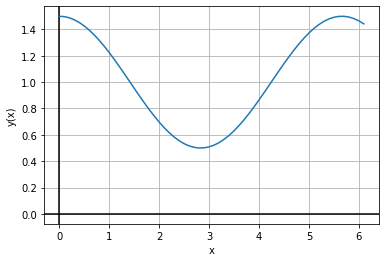

In [0]:
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(X,Y[:,0])
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

![imagen.png](attachment:imagen.png)
Las ecuaciones diferenciales que describen la 
corriente $i$ en el circuito son:<br>
$\displaystyle L \frac{di}{dt}+Ri+ \frac{q}{C}= E(t) \hspace{1cm}
\frac{dq}{dt}=i $<br>
Si el voltaje  aplicado E pasa de 0 a 9v , graficar la
corriente resultante durante los primeros  10 seg. 
Utilizar $R=10 \, \Omega$, $L=2\,H$ y $C=0.45\,F$

Haciendo <br>
$
\pmb y=\begin{vmatrix}
y_0  \\ 
y_1 
\end{vmatrix} =\begin{vmatrix}
q  \\ 
i 
\end{vmatrix}
$
<br>
que nos da las siguientes ecuaciones<br>
$
\pmb y'=\begin{vmatrix}
y'_0  \\ 
y'_1 &
\end{vmatrix} =\begin{vmatrix}
y_1 \\ 
(-Ry_1-y_0/C + E)/L&
\end{vmatrix}
$<br>

Con las condiciones iniciales <br>
$
\pmb y(0)=\begin{vmatrix}
0  \\ 
0 
\end{vmatrix}
$





In [0]:
def F(x,y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = (-10.0*y[1]-y[0]/0.45 +9.0)/2.0
    return F

In [0]:
x= 0.0
xstop = 10.0
y = np.array([0.0,0.0])
h=0.25
X,Y = runge_kutta_4(F, x, y, xstop, h)


In [0]:
printSoln(X,Y,10)


        x         y[ 0 ]        y[ 1 ]  
   0.0000e+00    0.0000e+00    0.0000e+00 
   2.5000e+00    1.6723e+00    5.5420e-01 
   5.0000e+00    2.7224e+00    3.0946e-01 
   7.5000e+00    3.3087e+00    1.7279e-01 
   1.0000e+01    3.6361e+00    9.6485e-02 


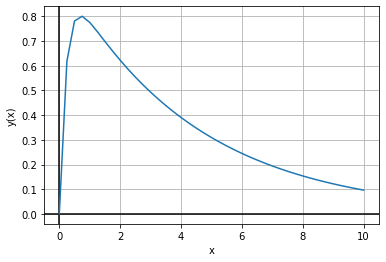

In [0]:
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(X,Y[:,1])
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

En la investigación de un homicidio o de una muerte accidental, con frecuencia es importante estimar el tiempo que ha transcurrido desde la muerte. De observaciones experimentales, se sabe que la temperatura superficial de un objeto cambia con una tasa proporcional a la diferencia entre la temperatura del objeto y la del ambiente circundante, o temperatura ambiente. Esto se conoce como ley de Newton del enfriamiento. Así, si $T(t)$ es la temperatura del objeto al tiempo $t$, y $Ta$ es la temperatura ambiente constante:<br>
$\displaystyle \frac{dT}{dt}=-K(T-T_a)$

donde $K > 0$ es una constante de proporcionalidad. Suponga que en el momento $t = 0$· se descubre un cuerpo y se mide su temperatura, $T_0$. Se supone que en el momento de la muerte, la temperatura del cuerpo, $T_d$, era el valor normal de 37ºC. Suponga que la temperatura del cuerpo al ser descubierto era de 29.5ºC, y que dos horas después era de 23.5ºC. La temperatura ambiente es de 20ºC.
- Determine K y el tiempo de la muerte.
- Resuelva la EDO en forma numérica y grafique los resultados

Integremos la ecuación $\frac{dT}{dt}=+K(T-Ta)$ y apliquemos los datos que nos dan para obtener K:
$\int \frac{dT}{T-T_a}= -K \int dt $ <br>
$log (T-T_a) = -Kt+C_1$<br>
$(T-T_a) = e^{-Kt+C_1}$<br>
$T=T_a+Ce^{-Kt}$ <br>
Para $t=0\,\,--->\,C=T_0-T_a$ <br>
$T-T_a = (T_0-T_a)e^{-Kt}$<br>
$\displaystyle e^{-Kt} = \frac{T-T_a}{T_0-Ta}$<br>
$\displaystyle  -Kt = ln \frac{T-T_a}{T_0-Ta}$<br>

$\displaystyle  K = - \frac{1}{t} ln \frac{T-T_a}{T_0-Ta}$<br>
De acuerdo a la descripción a t= 2 hrs
- T= 23.5 º
- $T_a= 20$
- $T_0 = 29.5$<br>
con lo que $ K = \frac{1}{2}ln \frac {23.5-20}{29.5-20}$<br>
## $K = 0.499264$





In [0]:
def F5(x, y):
    return -0.499264*(y-20)

In [0]:
x= 0.0
xstop = 2.0
y = np.array([37])
h=0.005
X1,Y1 = runge_kutta_4(F5, x, y, xstop, h)

In [0]:
printSoln(X1,Y1,1)


        x         y[ 0 ]  
   0.0000e+00    3.7000e+01 
   5.0000e-03    3.6958e+01 
   1.0000e-02    3.6915e+01 
   1.5000e-02    3.6873e+01 
   2.0000e-02    3.6831e+01 
   2.5000e-02    3.6789e+01 
   3.0000e-02    3.6747e+01 
   3.5000e-02    3.6706e+01 
   4.0000e-02    3.6664e+01 
   4.5000e-02    3.6622e+01 
   5.0000e-02    3.6581e+01 
   5.5000e-02    3.6540e+01 
   6.0000e-02    3.6498e+01 
   6.5000e-02    3.6457e+01 
   7.0000e-02    3.6416e+01 
   7.5000e-02    3.6375e+01 
   8.0000e-02    3.6334e+01 
   8.5000e-02    3.6294e+01 
   9.0000e-02    3.6253e+01 
   9.5000e-02    3.6213e+01 
   1.0000e-01    3.6172e+01 
   1.0500e-01    3.6132e+01 
   1.1000e-01    3.6092e+01 
   1.1500e-01    3.6051e+01 
   1.2000e-01    3.6011e+01 
   1.2500e-01    3.5971e+01 
   1.3000e-01    3.5932e+01 
   1.3500e-01    3.5892e+01 
   1.4000e-01    3.5852e+01 
   1.4500e-01    3.5813e+01 
   1.5000e-01    3.5773e+01 
   1.5500e-01    3.5734e+01 
   1.6000e-01    3.5695e+01 
   1.6500e-01  

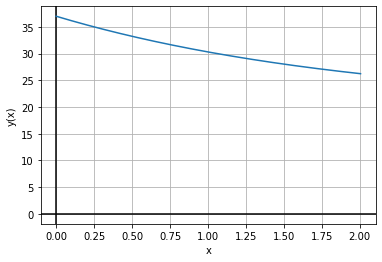

In [0]:
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(X1,Y1[:,0])
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

In [0]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]


In [0]:
value = 29.5
indice, valor = find_nearest(Y1[:,0],value)
print(indice, valor)
print(X1[indice])


233 29.502650731514734
1.1649999999999971


Se podría calcular el tienpo de la muerte <br>
$\displaystyle  -Kt = ln \frac{T-T_a}{T_0-Ta}$<br>
$t_d = -\frac{1}{K}ln \frac{T-T_a}{T_0-Ta}$<br>
$t_d = -\frac{1}{0.499264}ln \frac{37-20}{29.5-20}$<br>
## $t_d = -1.1655\,\, hrs$<br>




#### 8.-  La ecuación diferencial que define el movimiento de un péndulo, considerando la fricción es :<br>
$\theta''(t) + b \theta'(t) + c \sin(\theta(t)) = 0.$ <br>
#### Si $\omega(t) = \theta'(t)$ tenemos <br>
$ \begin{cases}
\theta'(t) = \omega(t) \\
\omega'(t) = -b \omega(t) - c \sin(\theta(t))
\end{cases}
$<br>
#### Considerando b = 0.25 y c = 5.0 y las condiciones iniciales $\theta(0) = pi - 0.1$, y  $\omega(0) = 0$ 
#### Graficar $\theta(t)$  y  $ \omega(t) $ desde t = 0 a 10 seg. Considerar h=0.1 seg.

Haciendo <br>
$
\pmb y=\begin{vmatrix}
y_0  \\ 
y_1 
\end{vmatrix} =\begin{vmatrix}
\theta \\ 
\omega
\end{vmatrix}
$
<br>
que nos da las siguientes ecuaciones<br>
$
\pmb y'=\begin{vmatrix}
y'_0 = \omega \\ 
y'_1 = \omega'&
\end{vmatrix} =\begin{vmatrix}
y1 \\ 
 -b \omega(t) - c \sin(\theta(t))
\end{vmatrix}=\begin{vmatrix}
y1 \\ 
 -b y_1 - c \sin(y_0)
\end{vmatrix}
$<br>

Con las condiciones iniciales <br>
$
\pmb y(0)=\begin{vmatrix}
\pi-0.1  \\ 
0 
\end{vmatrix}
$


In [0]:
def F7(x,y):
    F = np.zeros(2)
    b = 0.25
    c = 5.0
    F[0] = y[1]
    F[1] = -b*y[1]-c*np.sin(y[0])
    return F

In [0]:
x= 0.0
xstop = 10
y = np.array([np.pi-0.1,0])
h=0.1
X,Y = runge_kutta_4(F7, x, y, xstop, h)

In [0]:
printSoln(X,Y,10)


        x         y[ 0 ]        y[ 1 ]  
   0.0000e+00    3.0416e+00    0.0000e+00 
   1.0000e+00    2.7021e+00   -9.0103e-01 
   2.0000e+00    2.4685e-01   -4.0034e+00 
   3.0000e+00   -1.8752e+00    3.3851e-01 
   4.0000e+00    4.2131e-01    3.0263e+00 
   5.0000e+00    1.1661e+00   -1.6435e+00 
   6.0000e+00   -1.0519e+00   -1.0778e+00 
   7.0000e+00   -6.7041e-02    2.2680e+00 
   8.0000e+00    8.3656e-01   -9.6686e-01 
   9.0000e+00   -6.9953e-01   -8.1130e-01 
   1.0000e+01    1.9816e-02    1.5679e+00 
   1.0100e+01    1.7288e-01    1.4812e+00 


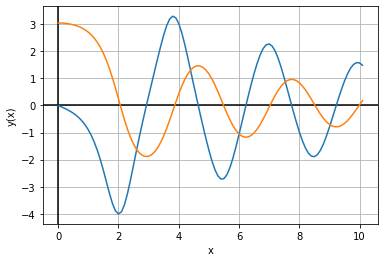

In [0]:
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(X,Y[:,1])
plt.plot(X,Y[:,0])
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()
